# cleaning both websites

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load both datasets
df_hilal = pd.read_csv("hilal_sale_data.csv")

df_hilal


,Title,Location,Bedrooms,Bathrooms,Garage,Price,Size,Listing_Type
0,3-BEDROOM APARTMENT,Bausher,3.0,NaN,SHADED,45000,NaN,For Sale
1,3-BEDROOM VILLA,Al Mawaleh,4.0,NaN,SHADED,290000,NaN,For Sale
2,6-BEDROOM TWIN VILLA,Bausher,7.0,NaN,SHADED,180000,NaN,For Sale
3,7-BEDROOM DETACHED VILLA,Al Ansab,9.0,NaN,SHADED,300000,758.00,For Sale
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,NaN,SHADED,80000,NaN,For Sale
...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9.0,NaN,SHADED OUTSIDE,300000,NaN,For Sale
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3.0,NaN,UNSHADED,80000,199.00,For Sale
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8.0,NaN,4,-320000,670.00,For Sale
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8.0,NaN,1,85000,NaN,For Sale


In [5]:
df_dubizzle = pd.read_csv("dubizzle_properties_for_sale.csv")
df_dubizzle 

,Title,Location,Bedrooms,Bathrooms,Garage,Price,Size,Listing_Type
0,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,"The Wave (Almouj), Muscat•",1,2,Not specified,"OMR 125,000Freehold",110 SQM,For Sale
1,5 BR Spacious Villa in Azaiba Nearby Amenities,"Azaiba, Muscat•",5,4,Not specified,"OMR 197,000Non Freehold",600 SQM,For Sale
2,Two Bedroom Seaview Apartment at Mandarin Orie...,"Qurum, Muscat•",2,3,Not specified,"OMR 405,000Freehold",131 SQM,For Sale
3,Villa for Sale (Garden) - Sea View,"Yiti, Muscat•",4,6,Not specified,"OMR 517,000Negotiable",506 SQM,For Sale
4,Apartment for sale in Muscat- شقة للبيع في مسقط,"Yiti, Muscat•",1,2,Not specified,"OMR 87,000Negotiable",79 SQM,For Sale
...,...,...,...,...,...,...,...,...
4657,Apartment for Sale,"Al Khuwair, Muscat•",2,3,Not specified,"OMR 80,000Negotiable",150 SQM,For Sale
4658,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",Not specified,Not specified,Not specified,"OMR 2,200",600 SQM,For Sale
4659,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",Not specified,Not specified,Not specified,"OMR 2,000Negotiable",10 SQM,For Sale
4660,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",Not specified,Not specified,Not specified,"OMR 31,000",600 SQM,For Sale


# data exploring

In [6]:
print("Hilal Data Shape:", df_hilal.shape)
print("Dubizzle Data Shape:", df_dubizzle.shape)
print("\nHilal Columns:", df_hilal.columns.tolist())
print("Dubizzle Columns:", df_dubizzle.columns.tolist())

Hilal Data Shape: (63, 8)
Dubizzle Data Shape: (4662, 8)

Hilal Columns: ['Title', 'Location', 'Bedrooms', 'Bathrooms', 'Garage', 'Price', 'Size', 'Listing_Type']
Dubizzle Columns: ['Title', 'Location', 'Bedrooms', 'Bathrooms', 'Garage', 'Price', 'Size', 'Listing_Type']


##  Data Cleaning 

In [11]:
# Standardize column names (they're already similar, but let's make identical)
column_mapping = {
    'Title': 'title',
    'Location': 'location',
    'Bedrooms': 'bedrooms',
    'Bathrooms': 'bathrooms',
    'Garage': 'garage',
    'Price': 'price',
    'Size': 'size',
    'Listing_Type': 'listing_type'
}

df_hilal = df_hilal.rename(columns=column_mapping)
df_dubizzle = df_dubizzle.rename(columns=column_mapping)



In [12]:
df_hilal

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source
0,3-BEDROOM APARTMENT,Bausher,3.0,NaN,SHADED,45000,NaN,For Sale,hilal
1,3-BEDROOM VILLA,Al Mawaleh,4.0,NaN,SHADED,290000,NaN,For Sale,hilal
2,6-BEDROOM TWIN VILLA,Bausher,7.0,NaN,SHADED,180000,NaN,For Sale,hilal
3,7-BEDROOM DETACHED VILLA,Al Ansab,9.0,NaN,SHADED,300000,758.00,For Sale,hilal
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,NaN,SHADED,80000,NaN,For Sale,hilal
...,...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9.0,NaN,SHADED OUTSIDE,300000,NaN,For Sale,hilal
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3.0,NaN,UNSHADED,80000,199.00,For Sale,hilal
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8.0,NaN,4,-320000,670.00,For Sale,hilal
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8.0,NaN,1,85000,NaN,For Sale,hilal


In [13]:
df_dubizzle

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source
0,Luxury Apartment|Mouj Muscat |Freehold Ownersh...,"The Wave (Almouj), Muscat•",1,2,Not specified,"OMR 125,000Freehold",110 SQM,For Sale,dubizzle
1,5 BR Spacious Villa in Azaiba Nearby Amenities,"Azaiba, Muscat•",5,4,Not specified,"OMR 197,000Non Freehold",600 SQM,For Sale,dubizzle
2,Two Bedroom Seaview Apartment at Mandarin Orie...,"Qurum, Muscat•",2,3,Not specified,"OMR 405,000Freehold",131 SQM,For Sale,dubizzle
3,Villa for Sale (Garden) - Sea View,"Yiti, Muscat•",4,6,Not specified,"OMR 517,000Negotiable",506 SQM,For Sale,dubizzle
4,Apartment for sale in Muscat- شقة للبيع في مسقط,"Yiti, Muscat•",1,2,Not specified,"OMR 87,000Negotiable",79 SQM,For Sale,dubizzle
...,...,...,...,...,...,...,...,...,...
4657,Apartment for Sale,"Al Khuwair, Muscat•",2,3,Not specified,"OMR 80,000Negotiable",150 SQM,For Sale,dubizzle
4658,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",Not specified,Not specified,Not specified,"OMR 2,200",600 SQM,For Sale,dubizzle
4659,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",Not specified,Not specified,Not specified,"OMR 2,000Negotiable",10 SQM,For Sale,dubizzle
4660,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",Not specified,Not specified,Not specified,"OMR 31,000",600 SQM,For Sale,dubizzle


In [15]:
df_hilal.isnull().sum()   #count of missing values per column

title            0
location         2
bedrooms         8
bathrooms       63
garage          15
price            0
size            16
listing_type     0
source           0
dtype: int64

In [16]:
df_dubizzle.isnull().sum()   # count of missing values per column

title           0
location        0
bedrooms        0
bathrooms       0
garage          0
price           0
size            0
listing_type    0
source          0
dtype: int64

In [33]:
df_dubizzle.dtypes

title           object
location        object
bedrooms        object
bathrooms       object
garage          object
price           object
size            object
listing_type    object
source          object
dtype: object

In [34]:
df_hilal.dtypes

title            object
location         object
bedrooms        float64
bathrooms       float64
garage           object
price             int64
size            float64
listing_type     object
source           object
dtype: object

In [19]:
#checking null values
df_hilal[df_hilal.isnull().any(axis=1)]

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source
0,3-BEDROOM APARTMENT,Bausher,3.0,NaN,SHADED,45000,NaN,For Sale,hilal
1,3-BEDROOM VILLA,Al Mawaleh,4.0,NaN,SHADED,290000,NaN,For Sale,hilal
2,6-BEDROOM TWIN VILLA,Bausher,7.0,NaN,SHADED,180000,NaN,For Sale,hilal
3,7-BEDROOM DETACHED VILLA,Al Ansab,9.0,NaN,SHADED,300000,758.00,For Sale,hilal
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,NaN,SHADED,80000,NaN,For Sale,hilal
...,...,...,...,...,...,...,...,...,...
58,6-BEDROOM DETACHED VILLA,Al Hail,9.0,NaN,SHADED OUTSIDE,300000,NaN,For Sale,hilal
59,3 BEDROOM TOWNHOUSE,Al Khoudh,3.0,NaN,UNSHADED,80000,199.00,For Sale,hilal
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),Al Mawaleh,8.0,NaN,4,-320000,670.00,For Sale,hilal
61,7 BEDROOM DETACHED VILLA IN (AL KHUWAIR),Al Khuwair,8.0,NaN,1,85000,NaN,For Sale,hilal


In [20]:
df_dubizzle[df_dubizzle.isnull().any(axis=1)]

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source


In [17]:
df_hilal.duplicated().sum()  # number of duplicate rows

np.int64(0)

In [18]:
df_dubizzle.duplicated().sum()

np.int64(377)

## Combine the 2 dataframe  (to clean them together)

In [22]:
# 2. Combine them (to clean them together)
df = pd.concat([df_hilal, df_dubizzle], ignore_index=True)

In [23]:
df.shape

(4725, 9)

In [25]:
df.isnull().sum()

title            0
location         2
bedrooms         8
bathrooms       63
garage          15
price            0
size            16
listing_type     0
source           0
dtype: int64

In [28]:
# Check unique values for categorical columns
for col in ['location', 'listing_Type']:  # Use your actual column names
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts(dropna=False).head(20))
    else:
        print(f"\nColumn '{col}' not found in dataframe")


Unique values in location:
location
Al Amarat, Muscat•              461
Barka, Al Batinah•              380
The Wave (Almouj), Muscat•      344
Al Maabilah, Muscat•            332
Yiti, Muscat•                   212
Bosher, Muscat•                 203
Muscat Hills, Muscat•           202
Al Khoud, Muscat•               159
Salalah, Dhofar•                153
Al Sifah, Muscat•               142
Al Seeb, Muscat•                140
Sultan Haitham City, Muscat•    126
Muscat - Other, Muscat•         113
Sohar, Al Batinah•               95
Al Masn'a, Al Batinah•           82
Ghala, Muscat•                   78
Al Mawaleh, Muscat•              75
Al Buraimi, Al Buraimi•          69
Qurum, Muscat•                   67
Al Hail, Muscat•                 67
Name: count, dtype: int64

Column 'listing_Type' not found in dataframe


In [30]:
def clean_numeric(series, unit=None):
#Clean numeric columns with optional unit conversion
# Convert to string and remove non-numeric chars
    cleaned = series.astype(str).str.replace(r'[^\d.]', '', regex=True)
    # Convert to numeric
    cleaned = pd.to_numeric(cleaned, errors='coerce')
    # Handle unit conversion if needed
    if unit == 'sqft_to_sqm':
        cleaned = cleaned * 0.092903  # sqft to sqm
    elif unit == 'k_to_m':
        cleaned = cleaned * 1000  # thousands to units
    
    return cleaned

# Apply to all numeric columns
df['price'] = clean_numeric(df['price'])
df['size'] = clean_numeric(df['size'], 'sqft_to_sqm')  # example conversion
df['bedrooms'] = clean_numeric(df['bedrooms'])
df['bathrooms'] = clean_numeric(df['bathrooms'])
df['garage'] = clean_numeric(df['garage'])

In [31]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source
0,3-BEDROOM APARTMENT,Bausher,3.0,NaN,NaN,45000.0,NaN,For Sale,hilal
1,3-BEDROOM VILLA,Al Mawaleh,4.0,NaN,NaN,290000.0,NaN,For Sale,hilal
2,6-BEDROOM TWIN VILLA,Bausher,7.0,NaN,NaN,180000.0,NaN,For Sale,hilal
3,7-BEDROOM DETACHED VILLA,Al Ansab,9.0,NaN,NaN,300000.0,70.420474,For Sale,hilal
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,NaN,NaN,80000.0,NaN,For Sale,hilal
...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,NaN,80000.0,13.935450,For Sale,dubizzle
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",NaN,NaN,NaN,2200.0,55.741800,For Sale,dubizzle
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",NaN,NaN,NaN,2000.0,0.929030,For Sale,dubizzle
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",NaN,NaN,NaN,31000.0,55.741800,For Sale,dubizzle


In [32]:
df.dtypes

title            object
location         object
bedrooms        float64
bathrooms       float64
garage          float64
price           float64
size            float64
listing_type     object
source           object
dtype: object

In [41]:
#Check for Similar Columns
print("Available columns:", df.columns.tolist())


Available columns: ['title', 'location', 'bedrooms', 'bathrooms', 'garage', 'price', 'size', 'listing_type', 'source', 'price_missing', 'size_missing']


In [43]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source,price_missing,size_missing
0,3-BEDROOM APARTMENT,Bausher,3.0,NaN,NaN,45000.0,NaN,For Sale,hilal,0,1
1,3-BEDROOM VILLA,Al Mawaleh,4.0,NaN,NaN,290000.0,NaN,For Sale,hilal,0,1
2,6-BEDROOM TWIN VILLA,Bausher,7.0,NaN,NaN,180000.0,NaN,For Sale,hilal,0,1
3,7-BEDROOM DETACHED VILLA,Al Ansab,9.0,NaN,NaN,300000.0,70.420474,For Sale,hilal,0,0
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,NaN,NaN,80000.0,NaN,For Sale,hilal,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,NaN,80000.0,13.935450,For Sale,dubizzle,0,0
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",NaN,NaN,NaN,2200.0,55.741800,For Sale,dubizzle,0,0
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",NaN,NaN,NaN,2000.0,0.929030,For Sale,dubizzle,0,0
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",NaN,NaN,NaN,31000.0,55.741800,For Sale,dubizzle,0,0


Property Types:
property_type
other        3347
apartment     731
house         647
Name: count, dtype: int64


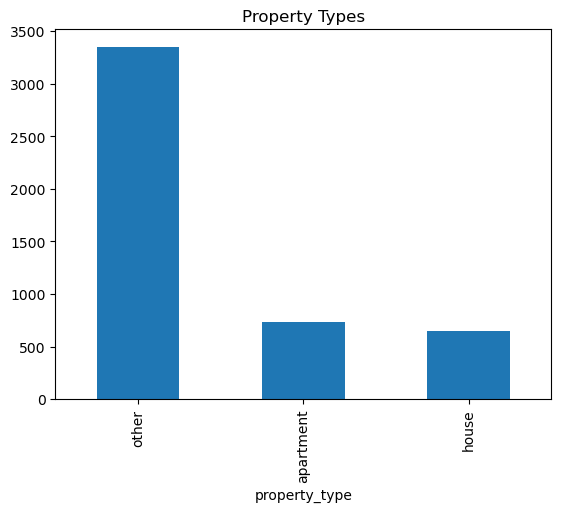

In [46]:
# 1. Quick Property Type Extraction
df['property_type'] = 'other'  # Default value

# Apartment keywords
apt_words = ['apartment', 'apt', 'flat', 'condo', 'studio']
df.loc[df['title'].str.lower().str.contains('|'.join(apt_words)), 'property_type'] = 'apartment'

# House keywords
house_words = ['house', 'villa', 'townhouse', 'bungalow']
df.loc[df['title'].str.lower().str.contains('|'.join(house_words)), 'property_type'] = 'house'

# 2. Basic Cleaning
df['property_type'] = df['property_type'].str.lower().str.strip()

# 3. Quick Check
print("Property Types:")
print(df['property_type'].value_counts())

# 4. Simple Visualization
df['property_type'].value_counts().plot(kind='bar', title='Property Types')
plt.show()

In [47]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source,price_missing,size_missing,property_type
0,3-BEDROOM APARTMENT,Bausher,3.0,NaN,NaN,45000.0,NaN,For Sale,hilal,0,1,apartment
1,3-BEDROOM VILLA,Al Mawaleh,4.0,NaN,NaN,290000.0,NaN,For Sale,hilal,0,1,house
2,6-BEDROOM TWIN VILLA,Bausher,7.0,NaN,NaN,180000.0,NaN,For Sale,hilal,0,1,house
3,7-BEDROOM DETACHED VILLA,Al Ansab,9.0,NaN,NaN,300000.0,70.420474,For Sale,hilal,0,0,house
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,NaN,NaN,80000.0,NaN,For Sale,hilal,0,1,house
...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,NaN,80000.0,13.935450,For Sale,dubizzle,0,0,apartment
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",NaN,NaN,NaN,2200.0,55.741800,For Sale,dubizzle,0,0,other
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",NaN,NaN,NaN,2000.0,0.929030,For Sale,dubizzle,0,0,other
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",NaN,NaN,NaN,31000.0,55.741800,For Sale,dubizzle,0,0,other


In [48]:
def treat_outliers(df, col):
    """Cap outliers using IQR method"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create indicator column
    df[f'{col}_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)
    
    # Cap values
    df[col] = df[col].clip(lower_bound, upper_bound)
    
    return df

# Apply to key numeric columns
for col in ['price', 'size', 'bedrooms', 'bathrooms']:
    df = treat_outliers(df, col)

In [49]:
df.isnull().sum()

title                   0
location                2
bedrooms             2338
bathrooms            2330
garage               4695
price                   0
size                   16
listing_type            0
source                  0
price_missing           0
size_missing            0
property_type           0
price_outlier           0
size_outlier            0
bedrooms_outlier        0
bathrooms_outlier       0
dtype: int64

In [50]:
# Fill numeric columns with median
for col in ['bedrooms', 'bathrooms', 'garage', 'size']:
    df[col].fillna(df[col].median(), inplace=True)

# Fill text columns with mode
df['location'].fillna('Unknown', inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
title                0
location             0
bedrooms             0
bathrooms            0
garage               0
price                0
size                 0
listing_type         0
source               0
price_missing        0
size_missing         0
property_type        0
price_outlier        0
size_outlier         0
bedrooms_outlier     0
bathrooms_outlier    0
dtype: int64


C:\Users\bbuser\AppData\Local\Temp\ipykernel_34500\4101852790.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\bbuser\AppData\Local\Temp\ipykernel_34500\4101852790.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

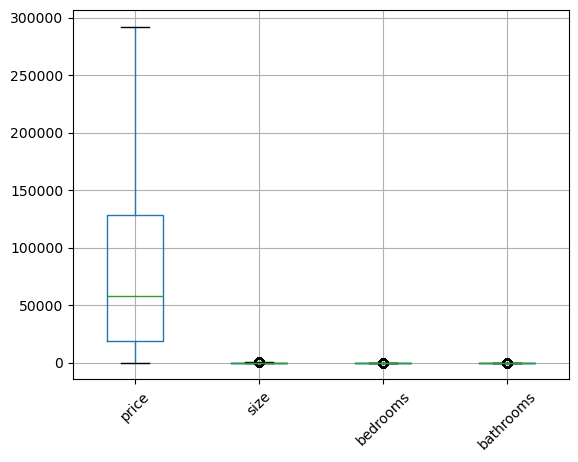

In [51]:
# Visualize outliers
# Outlier Check
df[['price', 'size', 'bedrooms', 'bathrooms']].boxplot()
plt.xticks(rotation=45)
plt.show()

## #Feature Engineering 

In [52]:
#Feature Engineering 
# 1. Price per sqm
df['price_per_sqm'] = df['price'] / df['size']

# 2. Total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# 3. Property size category
df['size_category'] = pd.cut(df['size'], 
                            bins=[0, 100, 200, 500, 1000, float('inf')],
                            labels=['Tiny', 'Small', 'Medium', 'Large', 'X-Large'])

In [53]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source,price_missing,size_missing,property_type,price_outlier,size_outlier,bedrooms_outlier,bathrooms_outlier,price_per_sqm,total_rooms,size_category
0,3-BEDROOM APARTMENT,Bausher,3.0,3.0,2.0,45000.0,37.161200,For Sale,hilal,0,1,apartment,0,0,0,0,1210.940443,6.0,Tiny
1,3-BEDROOM VILLA,Al Mawaleh,4.0,3.0,2.0,290000.0,37.161200,For Sale,hilal,0,1,house,0,0,0,0,7803.838412,7.0,Tiny
2,6-BEDROOM TWIN VILLA,Bausher,7.0,3.0,2.0,180000.0,37.161200,For Sale,hilal,0,1,house,0,0,0,0,4843.761773,10.0,Tiny
3,7-BEDROOM DETACHED VILLA,Al Ansab,7.0,3.0,2.0,292075.0,70.420474,For Sale,hilal,0,0,house,1,0,1,0,4147.586397,10.0,Tiny
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,3.0,2.0,80000.0,37.161200,For Sale,hilal,0,1,house,0,0,0,0,2152.783010,9.0,Tiny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,2.0,80000.0,13.935450,For Sale,dubizzle,0,0,apartment,0,0,0,0,5740.754694,5.0,Tiny
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3.0,3.0,2.0,2200.0,55.741800,For Sale,dubizzle,0,0,other,0,0,0,0,39.467689,6.0,Tiny
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3.0,3.0,2.0,2000.0,0.929030,For Sale,dubizzle,0,0,other,0,0,0,0,2152.783010,6.0,Tiny
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3.0,3.0,2.0,31000.0,55.741800,For Sale,dubizzle,0,0,other,0,0,0,0,556.135611,6.0,Tiny


property_type
house        199184.321020
apartment     96023.119918
other         68606.080624
Name: price, dtype: float64


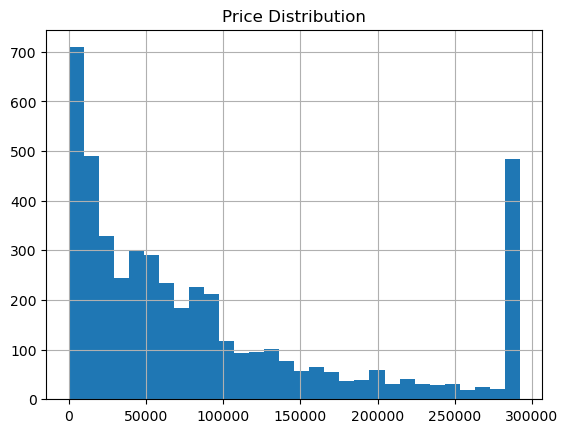


Top 10 Locations:
location
Al Amarat, Muscat•            461
Barka, Al Batinah•            380
The Wave (Almouj), Muscat•    344
Al Maabilah, Muscat•          332
Yiti, Muscat•                 212
Bosher, Muscat•               203
Muscat Hills, Muscat•         202
Al Khoud, Muscat•             159
Salalah, Dhofar•              153
Al Sifah, Muscat•             142
Name: count, dtype: int64


In [54]:
#Analysis Starter
# 1. Average price by property type
print(df.groupby('property_type')['price'].mean().sort_values(ascending=False))

# 2. Price distribution
df['price'].hist(bins=30)
plt.title('Price Distribution')
plt.show()

# 3. Top locations
print("\nTop 10 Locations:")
print(df['location'].value_counts().head(10))

In [58]:
#dropping unesseary columns:
df.columns.tolist()

['title',
 'location',
 'bedrooms',
 'bathrooms',
 'garage',
 'price',
 'size',
 'listing_type',
 'source',
 'price_missing',
 'size_missing',
 'property_type',
 'price_outlier',
 'size_outlier',
 'bedrooms_outlier',
 'bathrooms_outlier',
 'price_per_sqm',
 'total_rooms',
 'size_category']

In [59]:
# Columns You Likely DON'T Need 

cols_to_drop = [
    'price_missing',    # Already handled missing values
    'size_missing',     # Already handled missing values
    'price_outlier',    # Outlier flags (if you've already treated outliers)
    'size_outlier',     # Outlier flags
    'bedrooms_outlier', # Outlier flags
    'bathrooms_outlier' # Outlier flags
]

# Only drop columns that actually exist
cols_to_drop = [col for col in cols_to_drop if col in df.columns]

In [62]:
# Before Dropping - Quick Check
print("Would drop these columns:")
cols_to_drop

print("\nSample of outlier flags before dropping:")
print(df[cols_to_drop].head())

Would drop these columns:

Sample of outlier flags before dropping:
   price_missing  size_missing  price_outlier  size_outlier  bedrooms_outlier  \
0              0             1              0             0                 0   
1              0             1              0             0                 0   
2              0             1              0             0                 0   
3              0             0              1             0                 1   
4              0             1              0             0                 0   

   bathrooms_outlier  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [ ]:
df_clean = df.drop(columns=cols_to_drop, errors='ignore')
print("\nColumns after dropping:")
print(df_clean.columns.tolist())

In [67]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source,property_type,price_per_sqm,total_rooms,size_category
0,3-BEDROOM APARTMENT,Bausher,3.0,3.0,2.0,45000.0,37.161200,For Sale,hilal,apartment,1210.940443,6.0,Tiny
1,3-BEDROOM VILLA,Al Mawaleh,4.0,3.0,2.0,290000.0,37.161200,For Sale,hilal,house,7803.838412,7.0,Tiny
2,6-BEDROOM TWIN VILLA,Bausher,7.0,3.0,2.0,180000.0,37.161200,For Sale,hilal,house,4843.761773,10.0,Tiny
3,7-BEDROOM DETACHED VILLA,Al Ansab,7.0,3.0,2.0,292075.0,70.420474,For Sale,hilal,house,4147.586397,10.0,Tiny
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,3.0,2.0,80000.0,37.161200,For Sale,hilal,house,2152.783010,9.0,Tiny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,2.0,80000.0,13.935450,For Sale,dubizzle,apartment,5740.754694,5.0,Tiny
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3.0,3.0,2.0,2200.0,55.741800,For Sale,dubizzle,other,39.467689,6.0,Tiny
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3.0,3.0,2.0,2000.0,0.929030,For Sale,dubizzle,other,2152.783010,6.0,Tiny
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3.0,3.0,2.0,31000.0,55.741800,For Sale,dubizzle,other,556.135611,6.0,Tiny


In [68]:
df.isnull().sum()

title            0
location         0
bedrooms         0
bathrooms        0
garage           0
price            0
size             0
listing_type     0
source           0
property_type    0
price_per_sqm    0
total_rooms      0
size_category    0
dtype: int64

In [71]:
# Check if 'df' exists and contains data from both sources
if 'df' in locals() and 'source' in df.columns:
    print("Merged DataFrame detected! Source counts:")
    print(df['source'].value_counts())
else:
    print("DataFrames not merged yet. Proceed with merging.")

Merged DataFrame detected! Source counts:
source
dubizzle    4662
hilal         63
Name: count, dtype: int64


##  Exploratory Data Analysis (EDA

In [69]:
# Statistical Summary
df.describe(include='all').T  # For all columns (numeric + categorical)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,4725,4039,land for sell,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,4725,97,"Al Amarat, Muscat•",461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,4725.0,NaN,NaN,NaN,3.023492,1.258367,1.0,3.0,3.0,3.0,7.0
bathrooms,4725.0,NaN,NaN,NaN,3.304339,1.470811,0.0,3.0,3.0,3.0,9.5
garage,4725.0,NaN,NaN,NaN,2.000847,0.046001,1.0,2.0,2.0,2.0,4.0
price,4725.0,NaN,NaN,NaN,90727.980574,90997.352124,11.0,19000.0,58350.0,128230.0,292075.0
size,4725.0,NaN,NaN,NaN,42.959188,35.021579,0.092903,11.519972,37.1612,56.763733,125.000987
listing_type,4725,2,For Sale,4722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,4725,2,dubizzle,4662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_type,4725,3,other,3347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


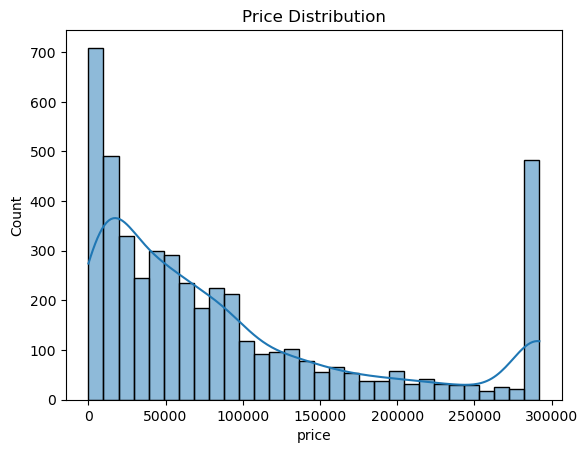

,title,price,location
3,7-BEDROOM DETACHED VILLA,292075.0,Al Ansab
48,5 BEDROOM DETACHED VILLA IN (MADINAT SULTAN QA...,292075.0,Madinat Qaboos (MQ)
55,4-BEDROOM STANDALONE VILLA,292075.0,Muscat Hills
58,6-BEDROOM DETACHED VILLA,292075.0,Al Hail
60,8 BEDROOM DETACHED VILLA IN (MAWALLEH),292075.0,Al Mawaleh


In [70]:
#Target Variable Analysis (Price)
# Distribution plot
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

# Top expensive properties
df.nlargest(5, 'price')[['title', 'price', 'location']]

# Feature Relationships

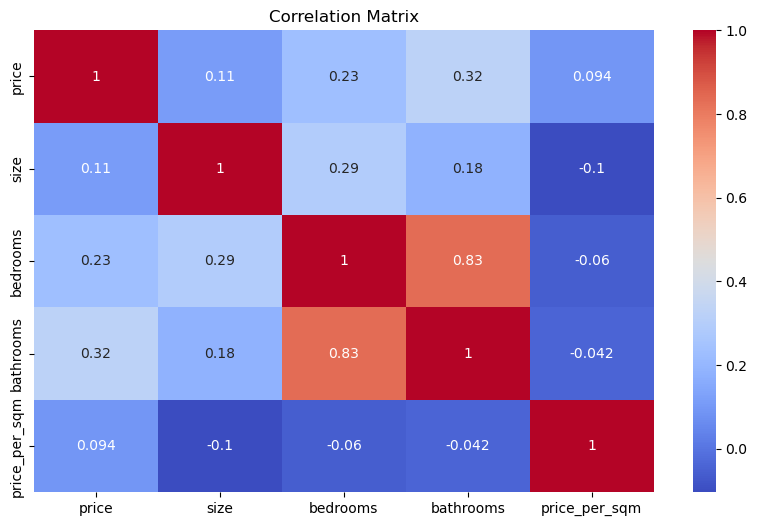

In [72]:
#Numeric Features Correlation

plt.figure(figsize=(10,6))
sns.heatmap(df[['price', 'size', 'bedrooms', 'bathrooms', 'price_per_sqm']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

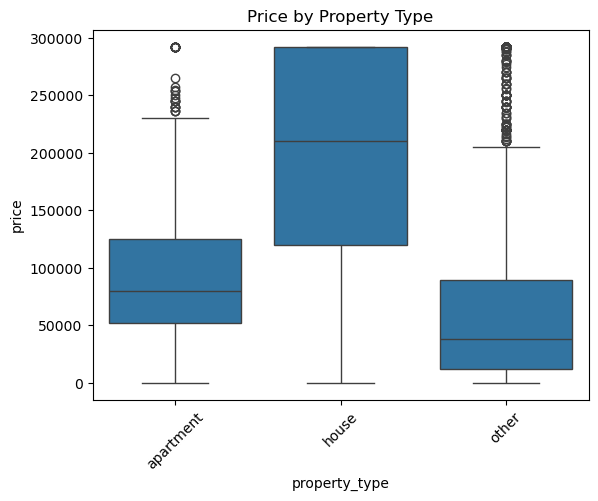

In [73]:
# Property Type vs Price 
#(Categorical Features vs Price)
sns.boxplot(data=df, x='property_type', y='price')
plt.xticks(rotation=45)
plt.title('Price by Property Type')
plt.show()

C:\Users\bbuser\AppData\Local\Temp\ipykernel_34500\1309206443.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top, x='price_per_sqm', y='location', ci=None)


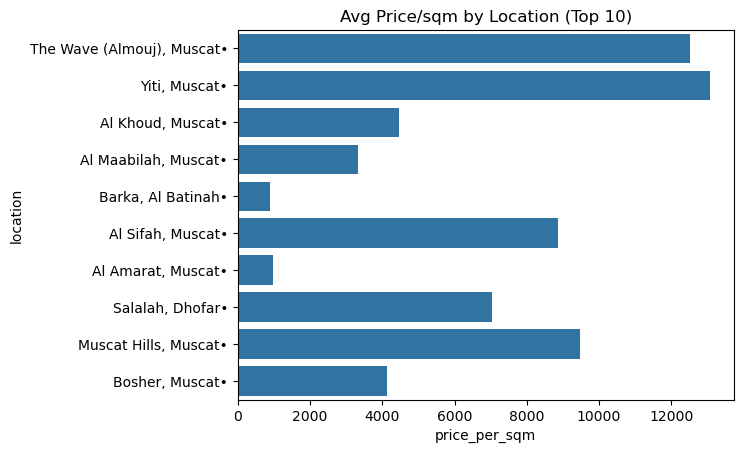

In [75]:
#Price per Sq.m by Location
top_locations = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_locations)]

sns.barplot(data=df_top, x='price_per_sqm', y='location', ci=None)
plt.title('Avg Price/sqm by Location (Top 10)')
plt.show()

In [79]:
#Bedroom Analysis
pd.pivot_table(df, 
               index='bedrooms', 
               values='price', 
               aggfunc=['mean', 'count']).sort_index()


,mean,count
,price,price
bedrooms,,
1.0,73662.583056,540
2.0,107473.468220,590
3.0,69941.652324,2758
4.0,163006.355705,298
5.0,159016.233716,261
6.0,151020.688742,151
7.0,155277.440945,127


In [99]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['price', 'title'])  # Features
y = df_encoded['price']                          # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (3780, 15), Test: (945, 15)


self note:
#One-Hot Encoding here   
* Create variables (we'll keep all categories)
property_dummies = pd.get_dummies(df['property_type'], prefix='prop')

* Concatenate with original data
df = pd.concat([df.drop('property_type', axis=1), property_dummies], axis=1)

* Verify new columns
print("New property columns:")
print(df.filter(like='prop_').head())

In [157]:
print(df[['prop_apartment', 'prop_house', 'prop_other']].head())
# one hot encoding

   prop_apartment  prop_house  prop_other
0            True       False       False
1           False        True       False
2           False        True       False
3           False        True       False
4           False        True       False


In [159]:
 df.columns

Index(['title', 'location', 'bedrooms', 'bathrooms', 'garage', 'price', 'size',
       'listing_type', 'source', 'price_per_sqm', 'total_rooms',
       'size_category', 'prop_apartment', 'prop_house', 'prop_other',
       'property_type'],
      dtype='object')

In [142]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source,price_per_sqm,total_rooms,size_category,prop_apartment,prop_house,prop_other
0,3-BEDROOM APARTMENT,Bausher,3.0,3.0,2.0,45000.0,37.161200,For Sale,hilal,1210.940443,6.0,Tiny,True,False,False
1,3-BEDROOM VILLA,Al Mawaleh,4.0,3.0,2.0,290000.0,37.161200,For Sale,hilal,7803.838412,7.0,Tiny,False,True,False
2,6-BEDROOM TWIN VILLA,Bausher,7.0,3.0,2.0,180000.0,37.161200,For Sale,hilal,4843.761773,10.0,Tiny,False,True,False
3,7-BEDROOM DETACHED VILLA,Al Ansab,7.0,3.0,2.0,292075.0,70.420474,For Sale,hilal,4147.586397,10.0,Tiny,False,True,False
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,3.0,2.0,80000.0,37.161200,For Sale,hilal,2152.783010,9.0,Tiny,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,2.0,80000.0,13.935450,For Sale,dubizzle,5740.754694,5.0,Tiny,True,False,False
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3.0,3.0,2.0,2200.0,55.741800,For Sale,dubizzle,39.467689,6.0,Tiny,False,False,True
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3.0,3.0,2.0,2000.0,0.929030,For Sale,dubizzle,2152.783010,6.0,Tiny,False,False,True
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3.0,3.0,2.0,31000.0,55.741800,For Sale,dubizzle,556.135611,6.0,Tiny,False,False,True


In [151]:
# Check if i have the original column deleted one by mistake:
if 'property_type' not in df.columns:
    # Reconstruct from one-hot encoded columns if possible
    if all(col in df.columns for col in ['prop_apartment', 'prop_house', 'prop_other']):
        conditions = [
            df['prop_apartment'] == 1,
            df['prop_house'] == 1,
            df['prop_other'] == 1
        ]
        choices = ['apartment', 'house', 'other']
        df['property_type'] = np.select(conditions, choices, default='unknown')
        print("Reconstructed 'property_type' column")
    else:
        print("Cannot reconstruct - no one-hot columns found")
else:
    print("'property_type' column already exists")

Reconstructed 'property_type' column


In [152]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source,price_per_sqm,total_rooms,size_category,prop_apartment,prop_house,prop_other,property_type
0,3-BEDROOM APARTMENT,Bausher,3.0,3.0,2.0,45000.0,37.161200,For Sale,hilal,1210.940443,6.0,Tiny,True,False,False,apartment
1,3-BEDROOM VILLA,Al Mawaleh,4.0,3.0,2.0,290000.0,37.161200,For Sale,hilal,7803.838412,7.0,Tiny,False,True,False,house
2,6-BEDROOM TWIN VILLA,Bausher,7.0,3.0,2.0,180000.0,37.161200,For Sale,hilal,4843.761773,10.0,Tiny,False,True,False,house
3,7-BEDROOM DETACHED VILLA,Al Ansab,7.0,3.0,2.0,292075.0,70.420474,For Sale,hilal,4147.586397,10.0,Tiny,False,True,False,house
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,3.0,2.0,80000.0,37.161200,For Sale,hilal,2152.783010,9.0,Tiny,False,True,False,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,2.0,80000.0,13.935450,For Sale,dubizzle,5740.754694,5.0,Tiny,True,False,False,apartment
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3.0,3.0,2.0,2200.0,55.741800,For Sale,dubizzle,39.467689,6.0,Tiny,False,False,True,other
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3.0,3.0,2.0,2000.0,0.929030,For Sale,dubizzle,2152.783010,6.0,Tiny,False,False,True,other
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3.0,3.0,2.0,31000.0,55.741800,For Sale,dubizzle,556.135611,6.0,Tiny,False,False,True,other


In [201]:
# Save to CSV
df.to_csv('cleaned_combined_properties.csv', index=False)


# Modeling
* Goal: Predict property prices (price) 
### here starts the modelling:

#### #1. Prepare Data

In [203]:
#Features (X) & Target (y)
# Features (numeric + one-hot encoded 'prop_' columns)
X = df[[
    'bedrooms', 'bathrooms', 'garage', 'size', 'price_per_sqm', 'total_rooms',
    'prop_apartment', 'prop_house', 'prop_other'
]]

# Target variable (what we want to predict)
y = df['price']

In [204]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 2. Model Training & Evaluation
## Option 1: Linear Regression (Baseline)
* RMSE: Average prediction error in price units.
* R² Score: % of variance explained by the model (0.7+ is good).

In [205]:
!pip install xgboost

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))  # Fixed RMSE calculation

Linear Regression Results:
R² Score: 0.3332825281269114
RMSE: 73207.01725708037


## Option 2: Random Forest (Handles Non-Linear Trends)
Why Random Forest?

Better for complex relationships.

Requires no feature scaling.

In [207]:
from sklearn.ensemble import RandomForestRegressor

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nRandom Forest Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))  # Fixed RMSE


Random Forest Results:
R² Score: 0.9980183532157867
RMSE: 3991.1212112928197


## Option 3: XGBoost (Best Performance)
Why XGBoost?

Often the best-performing algorithm for tabular data.

Automatically handles feature im

In [209]:
from xgboost import XGBRegressor

# Train model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("\nXGBoost Results:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


XGBoost Results:
R² Score: 0.9972279286252466
RMSE: 4720.4564828177145


### last cheackup

In [197]:
print(df.isnull().sum())  # Missing values?
print(df.describe())      # Outliers in price/size?

title             0
location          0
bedrooms          0
bathrooms         0
garage            0
price             0
size              0
listing_type      0
source            0
price_per_sqm     0
total_rooms       0
size_category     0
prop_apartment    0
prop_house        0
prop_other        0
property_type     0
dtype: int64
          bedrooms    bathrooms       garage          price         size  \
count  4725.000000  4725.000000  4725.000000    4725.000000  4725.000000   
mean      3.023492     3.304339     2.000847   90727.980574    42.959188   
std       1.258367     1.470811     0.046001   90997.352124    35.021579   
min       1.000000     0.000000     1.000000      11.000000     0.092903   
25%       3.000000     3.000000     2.000000   19000.000000    11.519972   
50%       3.000000     3.000000     2.000000   58350.000000    37.161200   
75%       3.000000     3.000000     2.000000  128230.000000    56.763733   
max       7.000000     9.500000     4.000000  292075.000000

In [202]:
df

,title,location,bedrooms,bathrooms,garage,price,size,listing_type,source,price_per_sqm,total_rooms,size_category,prop_apartment,prop_house,prop_other,property_type
0,3-BEDROOM APARTMENT,Bausher,3.0,3.0,2.0,45000.0,37.161200,For Sale,hilal,1210.940443,6.0,Tiny,True,False,False,apartment
1,3-BEDROOM VILLA,Al Mawaleh,4.0,3.0,2.0,290000.0,37.161200,For Sale,hilal,7803.838412,7.0,Tiny,False,True,False,house
2,6-BEDROOM TWIN VILLA,Bausher,7.0,3.0,2.0,180000.0,37.161200,For Sale,hilal,4843.761773,10.0,Tiny,False,True,False,house
3,7-BEDROOM DETACHED VILLA,Al Ansab,7.0,3.0,2.0,292075.0,70.420474,For Sale,hilal,4147.586397,10.0,Tiny,False,True,False,house
4,4-BEDROOM DETACHED VILLA,Al Hail,6.0,3.0,2.0,80000.0,37.161200,For Sale,hilal,2152.783010,9.0,Tiny,False,True,False,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,Apartment for Sale,"Al Khuwair, Muscat•",2.0,3.0,2.0,80000.0,13.935450,For Sale,dubizzle,5740.754694,5.0,Tiny,True,False,False,apartment
4721,أرض الطيب موقع جميل,"Ibri, Al Dhahirah•",3.0,3.0,2.0,2200.0,55.741800,For Sale,dubizzle,39.467689,6.0,Tiny,False,False,True,other
4722,all types of interlock avaialble watsapp me 95...,"Al Rusayl, Muscat•",3.0,3.0,2.0,2000.0,0.929030,For Sale,dubizzle,2152.783010,6.0,Tiny,False,False,True,other
4723,فرصة ذهبية بمخطط الوطن المقابل للمعبيلة 8 بكاف...,"Barka, Al Batinah•",3.0,3.0,2.0,31000.0,55.741800,For Sale,dubizzle,556.135611,6.0,Tiny,False,False,True,other
